In [1]:
import numpy as np
import scipy.sparse as sparse

# Plant dynamic model matrices
#A = np.zeros((84+7*27,84+7*27))
#B = np.identity(84+7*27)
A = np.zeros((6,6))
B = np.identity(6)
nx,nu = A.shape[0], B.shape[1]

# MPC settings
# Prediction horizon
npred = 6
# Weighting matrices
Q = sparse.block_diag([1]*nx)
R = sparse.block_diag([1]*nu)
# Controller output constraints
dumin, dumax = [], [] #-0.1e-6*np.ones(nu), 0.1e-6*np.ones(nu)
umin, umax = -2*np.ones(nu), 2*np.ones(nu)


#### MPC assessment without account for additional IO delay

In [2]:
import sys
sys.path.append('/Users/rromano/Workspace/SIMCEO/dos')

import mpc_driver as mpcCtrl

# Initialize MPC object
AcOshC = mpcCtrl.MPC(A=A,B=B,Q=Q,R=R,npred=npred,
                     dumin=dumin,dumax=dumax,umin=umin,umax=umax,
                     tau=None, tag='MPC', logs=None, delay=0, sampling_rate=1)
AcOshC.init()

# Simulation initial conditions
np.random.seed(19680801)
# State and output
x = 2*np.random.uniform(-1,1,nx) #np.zeros(nx)#
#x[22] = 1e-6

x0 = x # Make it compatible with SIMCEO
u, udelay = np.zeros(nu), np.zeros(nu)

In [3]:
# Closed-loop simulation
nsim = 20
udt, xdt = np.zeros((nu,nsim)), np.zeros((nx,nsim)) 

for i in range(nsim):
    
    # Save u,y
    udt[:,i] = u
    xdt[:,i] = x
    
    AcOshC.update(x)
    u = np.hstack(AcOshC.output())
    
    # Apply first control input to the plant
    w = x0 -0.001*np.random.uniform(0.95,1.05,A.shape[0])
    x = np.dot(A,x) + np.dot(B, udelay) + w
    udelay = u
    


In [4]:
# Plot results
import matplotlib.pyplot as plt

kt = np.arange(0,nsim)

plt.figure(figsize=(16,8))
plt.subplot(211)
for k in range(nx):
    plt.plot(kt,xdt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('State')
    
plt.subplot(212)
for k in range(nu):
    plt.plot(kt,udt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('Control effort')
    plt.xlabel('Sampling instant')

plt.show()

<Figure size 1600x800 with 2 Axes>

#### MPC assessment accounting for additional IO delay
##### Does not provide the expected results

In [5]:
import sys
sys.path.append('/Users/rromano/Workspace/SIMCEO/dos')

import mpc_delay_driver as mpcCtrl

# Initialize MPC object
AcOshC = mpcCtrl.MPC_1delay(A=A,B=B,Q=Q,R=R,npred=npred,
                     dumin=dumin,dumax=dumax,umin=umin,umax=umax,
                     tau=None, tag='MPC_delay', logs=None, delay=0, sampling_rate=1)
AcOshC.init()

# Simulation initial conditions
np.random.seed(19680801)
# State and output
x = 2*np.random.uniform(-1,1,nx) #np.zeros(nx)#
#x[22] = 1e-6

x0 = x # Make it compatible with SIMCEO
u, udelay = np.zeros(nu), np.zeros(nu)

Absolute constraints introduced to MPC


In [6]:
# Closed-loop simulation
nsim = 20
udt, xdt = np.zeros((nu,nsim)), np.zeros((nx,nsim)) 

for i in range(nsim):
    
    # Save u,y
    udt[:,i] = u
    xdt[:,i] = x
    
    AcOshC.update(x)
    u = np.hstack(AcOshC.output())
    
    # Apply first control input to the plant
    w = x0 -0.001*np.random.uniform(0.95,1.05,A.shape[0])
    x = np.dot(A,x) + np.dot(B, udelay) + w
    udelay = u
    


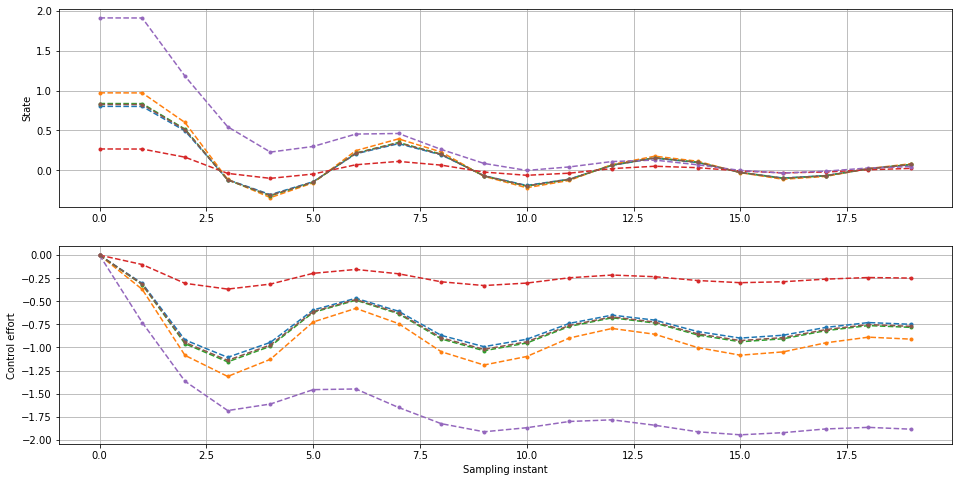

In [7]:
# Plot results
import matplotlib.pyplot as plt

kt = np.arange(0,nsim)

plt.figure(figsize=(16,8))
plt.subplot(211)
for k in range(nx):
    plt.plot(kt,xdt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('State')
    
plt.subplot(212)
for k in range(nu):
    plt.plot(kt,udt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('Control effort')
    plt.xlabel('Sampling instant')

plt.show()